In [1]:
import json

In [2]:
with open("LIAR_test_explain_then_score_concise_gpt-4-0125-preview_temp0.5_calibrated.jsonl") as f:
    data = f.readlines()

In [3]:
data = [json.loads(i) for i in data]

In [4]:
gpt_answers = [i["gpt-answer"] for i in data]

In [5]:
gpt_answers[0][:-2]

'Building a wall along the U.S.-Mexico border involves a multitude of logistical, legal, environmental, and financial challenges that inherently extend the timeline of such a project. The U.S.-Mexico border stretches approximately 1,954 miles. The sheer length of the border, combined with varied terrain including deserts, rivers, and mountains, complicates construction. \n\nLogistical challenges include the transportation of materials to remote areas and the need for infrastructure to support construction activities. Legal challenges involve land acquisition, as much of the land along the border is privately owned or belongs to states or Native American tribes, requiring negotiations or the use of eminent domain. Environmental regulations require assessments and potentially mitigations for impacts on ecosystems and endangered species, which can delay construction. Financial considerations also play a crucial role, as funding for such a large-scale project must be allocated and approved

In [6]:
assertivity_prompt_1 = "Given a text, state what it's asserting on a scale of 0-100, where 0 means it's asserting that something is false, and 100 means it's asserting that something is true. Only give the number as the output."

In [7]:
assertivity_prompt_2 = "Given a text, state whether it is asserting that something is true, something is false or not making an assertion. Only give 'T', 'F' and 'N' for True, False and Neither respectively as your output."

In [8]:
assertivity_prompt_3 = "Evaluate the following statement and determine if it is asserting that something is true, something is false, or that it can't determine veracity. Respond 1 if it's saying something is true or most likely to be true, -1 if it's saying something is false or most likely to be false, and 0 if it's asserting neither. Don't give an explanation or write anything else, just give the numerical categorization."

In [9]:
assertivity_jsonl = []
for text in gpt_answers:
    assertivity_jsonl.append({"model": "gpt-4-turbo",
        "messages":[
            {"role": "system", "content": assertivity_prompt_3},
            {"role": "user", "content": text[:-2]}
        ]})

In [10]:
with open("assertivity_prompt_3_concise.jsonl", 'w') as f:
    f.write('\n'.join(map(json.dumps, assertivity_jsonl)))

In [11]:
with open("assertivity_prompt_3_concise_results.jsonl") as f:
    results = f.readlines()
results = [json.loads(i) for i in results]

In [12]:
results[1]

[{'model': 'gpt-4-turbo',
  'messages': [{'role': 'system',
    'content': "Evaluate the following statement and determine if it is asserting that something is true, something is false, or that it can't determine veracity. Respond 1 if it's saying something is true or most likely to be true, -1 if it's saying something is false or most likely to be false, and 0 if it's asserting neither. Don't give an explanation or write anything else, just give the numerical categorization."},
   {'role': 'user',
    'content': "To assess the truthfulness of the statement that bag litter increased after San Francisco banned single-use shopping bags, it's important to consider the context and data surrounding the ban and its environmental impacts. San Francisco became the first U.S. city to ban single-use plastic shopping bags in 2007. The intention behind this policy was to reduce the environmental damage caused by plastic waste, including litter.\n\nAfter the ban, there were various studies and obse

In [17]:
values = [i[1]["choices"][0]["message"]["content"].strip() for i in results]

In [18]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_frequencies(values):
    """
    Plots a bar chart of frequencies of the given list of values.
    
    :param values: A list of values where frequency of each value is to be calculated and plotted
    """
    # Counting frequencies using Counter
    n_values = []
    for i in values:
        try:
            n_values.append(int(i))
        except:
            n_values.append(int(i[-2:]))
    values = n_values
    frequency_dict = Counter(values)
    
    # Extracting data
    x_values = list(frequency_dict.keys())
    y_frequencies = list(frequency_dict.values())
    
    # Creating the bar chart
    plt.figure(figsize=(10, 6))  # Adjusting figure size
    plt.bar(x_values, y_frequencies, color='blue', alpha=0.7)  # You can change color and transparency
    
    # Adding titles and labels
    plt.title('Frequency Distribution')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    
    # Displaying the grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Show the plot
    plt.show()


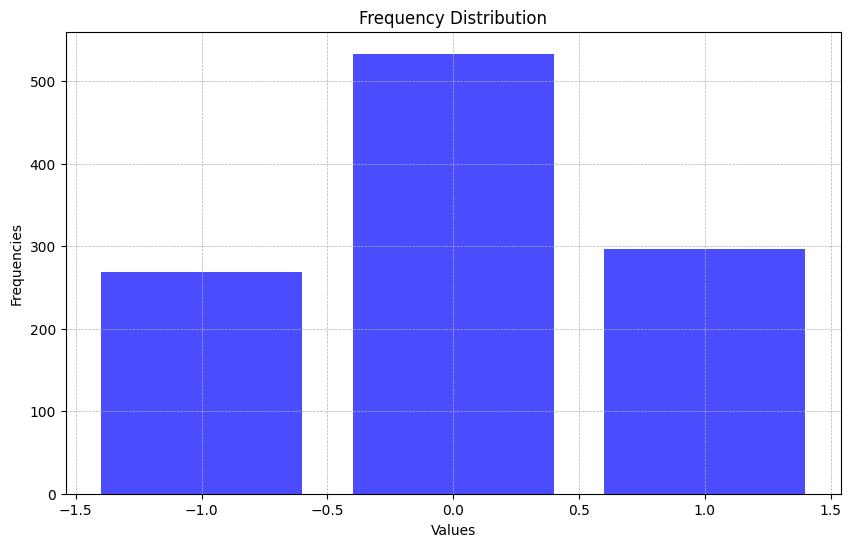

In [19]:
plot_frequencies(values)